# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

**Признаки** 
>- **RowNumber**  — индекс строки в данных
>- **CustomerId**  — уникальный идентификатор клиента
>- **Surname**  — фамилия
>- **CreditScore**  — кредитный рейтинг
>- **Geography**  — страна проживания
>- **Gender**  — пол
>- **Age**  — возраст
>- **Tenure**  — количество недвижимости у клиента
>- **Balance**  — баланс на счёте
>- **NumOfProducts**  — количество продуктов банка, используемых клиентом
>- **HasCrCard**  — наличие кредитной карты
>- **IsActiveMember**  — активность клиента
>- **EstimatedSalary**  — предполагаемая зарплата

**Целевой признак**
>- **Exited**  — факт ухода клиента

# Содержание

>[1. Подготовка даннных](#id-open) \
>[2. Исследование задачи](#id-exploration) \
>[3. Борьба с дисбалансом](#id-disbalance) \
>[4. Тестирование модели](#id-test)


# 1. Подготовка данных<a id="id-open"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
import numpy as np
import warnings
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [9]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [10]:
target = df["Exited"]

In [11]:
features = df.drop("Exited", axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=47)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=47)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((6000, 10), (6000,), (2000, 10), (2000,), (2000, 10), (2000,))

## Вывод по 1 разделу

- В исходном наборе данных 14 переменных  (одна из них целевая) и 10000 наблюдений;
- 3 переменные RowNumber, CustomerId, Surname убрала, так как они не придадут дополнительную предсказательную силу модели; 
- Переменную Tenure убрала, так как она содержит пустые значения и после выбора лучшей модели, вывела важность факторов модели. Данная переменная имеет низкую важность, поэтому от нее решила избавиться, что в итоге улучишило метрику F1 c 0.62 до 0.64;
- 2 категориальные переменные Geography и Gender с помощью OHE преобразовала в числовые, чтобы избежать дамми-ловушки, сделала аргумент drop_first=True;
- Выделила целевую переменную и признаки для предсказания. Разделила выборку на тренировочную, валидационную и тестовую в пропорции 60-20-20. Аргумент stratify сделала равным True для того, чтобы в выборках было одинаковое соотношение положительных и отрицательных ответов целевой переменной.

# 2. Исследование задачи<a id="id-exploration">

## 2.1 Выявление дисбаланса классов

In [15]:
df["Exited"].value_counts()[1]/len(df["Exited"])*100

20.369999999999997

In [16]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
y_train.value_counts()

0    4778
1    1222
Name: Exited, dtype: int64

In [18]:
y_train.value_counts()[1]/len(y_train)

0.20366666666666666

In [19]:
y_valid.value_counts()

0    1592
1     408
Name: Exited, dtype: int64

In [20]:
y_valid.value_counts()[1]/len(y_valid)

0.204

In [21]:
y_test.value_counts()[1]/len(y_valid)

0.2035

In [22]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

## 2.2 Тестирование различных моделей без учета дисбаланса

### 2.2.1 Decision tree

In [23]:
model = DecisionTreeClassifier(random_state=47)

In [24]:
param_grid = { 
    'min_samples_leaf': list(range(2,21)),
    'min_samples_split': list(range(2,6)),
    'max_depth' : list(range(2,11)),
    'criterion' :['gini', 'entropy']
}

In [25]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [26]:
proba = clf.predict_proba(X_valid)

In [27]:
f1_dt = f1_score(y_valid, y_pred)

In [28]:
auc_dt = roc_auc_score(y_valid, proba[:, 1])

In [29]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_valid, proba[:, 1])

In [30]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_dt, "\n AUC-score:", auc_dt)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 13, 'min_samples_split': 2} 
 F1-score: 0.5851528384279476 
 AUC-score: 0.8372122561336092


### 2.2.2 Random forest

In [31]:
model = RandomForestClassifier(random_state=47)

In [32]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12, 13],
    'criterion' :['gini', 'entropy']
}

In [33]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [34]:
proba = clf.predict_proba(X_valid)

In [35]:
f1_rf = f1_score(y_valid, y_pred)

In [36]:
auc_rf = roc_auc_score(y_valid, proba[:, 1])

In [37]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, proba[:, 1])

In [38]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 500} 
 F1-score: 0.5502318392581144 
 AUC-score: 0.8572257734752192


###  2.2.3 Logistic Regression

In [39]:
scaler = StandardScaler()
scaler.fit(X_train) 

StandardScaler()

In [40]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = LogisticRegression(random_state=47)

In [42]:
param_grid = { 
    "C": [0.001,0.01,0.1,1,10,100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [43]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_valid_scaled)

In [44]:
proba = clf.predict_proba(X_valid)

In [45]:
f1_lr = f1_score(y_valid, y_pred)

In [46]:
auc_lr = roc_auc_score(y_valid, proba[:, 1])

In [47]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_valid, proba[:, 1])

In [48]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_lr, "\n AUC-score:", auc_lr)


 Показатели лучшей модели: {'C': 10, 'solver': 'newton-cg'} 
 F1-score: 0.2964285714285715 
 AUC-score: 0.5028520359148684


## 2.3 ROC-curve

<Figure size 432x288 with 0 Axes>

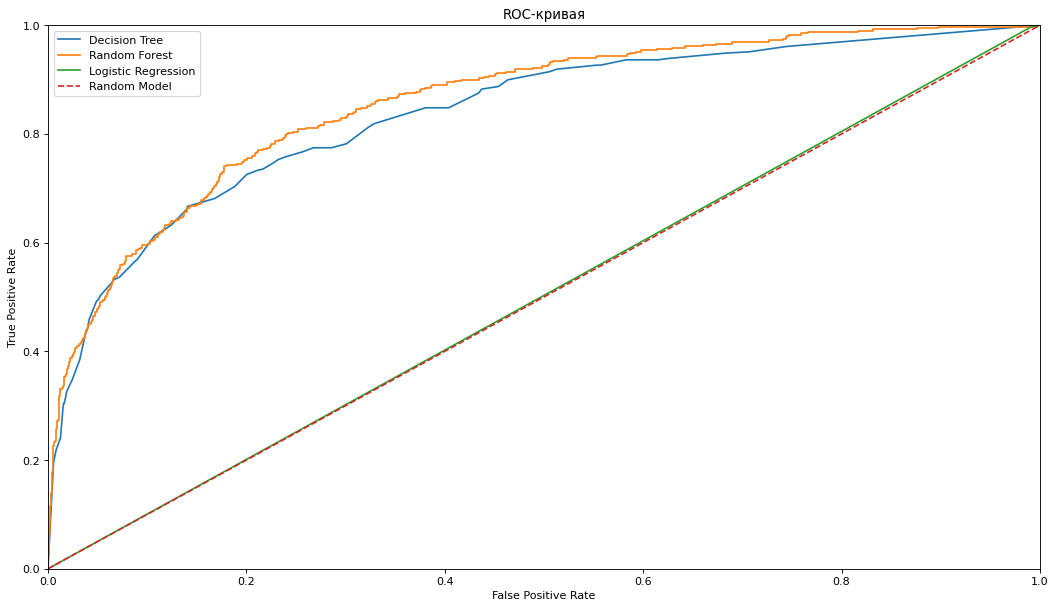

In [49]:
plt.figure()
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr_dt,tpr_dt, label= "Decision Tree")
plt.plot(fpr_rf,tpr_rf, label = "Random Forest")
plt.plot(fpr_lr,tpr_lr, label = "Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', label = "Random Model")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

In [50]:
results = pd.DataFrame({'f1_withoutbalance': [f1_dt, f1_rf, f1_lr], 'auc_withoutbalance': [auc_dt, auc_rf, auc_lr]})

In [51]:
results.index = ["Decision Tree", "Random Forest", "Logistic Regression"]

In [52]:
results

,f1_withoutbalance,auc_withoutbalance
Decision Tree,0.585153,0.837212
Random Forest,0.550232,0.857226
Logistic Regression,0.296429,0.502852


# Вывод по 2 разделу

- Выявлен дисбаланс классов. Исследованы модели без учета дисбаланса классов. 
- Наивысшую f1-меру показывает Decision Tree, но у нее меньший AUC по сравнению с Random Forest. Метрика AUC менее чувствительная к дисбалансу классов, поэтому в реальных задачах чаще используется f1. 
- Ни одна модель не превысила f1 = 0.59. Будем бороться с дисбалансом классов.
- AUC Logistic Regression близок к случайной модели. Данный алгоритм пока самый неэффективный для решения поставленной задачи.

# 3. Борьба с дисбалансом<a id="id-disbalance">

##  3.1 Взвешивание классов

### 3.1.1 Decision tree

In [53]:
model = DecisionTreeClassifier(random_state=47, class_weight="balanced")

In [54]:
param_grid = { 
    'min_samples_leaf': list(range(2,21)),
    'min_samples_split': list(range(2,6)),
    'max_depth' : list(range(2,11)),
    'criterion' :['gini', 'entropy']
}

In [55]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [56]:
proba = clf.predict_proba(X_valid)

In [57]:
f1_dt = f1_score(y_valid, y_pred)

In [58]:
auc_dt = roc_auc_score(y_valid, proba[:, 1])

In [59]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_valid, proba[:, 1])

In [60]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_dt, "\n AUC-score:", auc_dt)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 2} 
 F1-score: 0.5840886203423967 
 AUC-score: 0.8433181532663316


### 3.1.2 Random forest

In [61]:
model = RandomForestClassifier(random_state=47, class_weight="balanced")

In [62]:
param_grid = { 
    'n_estimators': [10, 100, 500, 550],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12, 13],
    'criterion' :['gini', 'entropy']
}

In [63]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [64]:
proba = clf.predict_proba(X_valid)

In [65]:
f1_rf = f1_score(y_valid, y_pred)

In [66]:
auc_rf = roc_auc_score(y_valid, proba[:, 1])

In [67]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100} 
 F1-score: 0.6049661399548533 
 AUC-score: 0.8566761503596413


In [68]:
best_model = clf.best_estimator_

In [69]:
important_features = pd.Series(data=best_model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

In [70]:
important_features

Age                  0.329025
NumOfProducts        0.215734
Balance              0.124798
CreditScore          0.092329
EstimatedSalary      0.089164
IsActiveMember       0.059930
Geography_Germany    0.044876
Gender_Male          0.020685
HasCrCard            0.012133
Geography_Spain      0.011326
dtype: float64

###  3.1.3 Logistic Regression

In [71]:
scaler = StandardScaler()
scaler.fit(X_train) 

StandardScaler()

In [72]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [73]:
model = LogisticRegression(random_state=47, class_weight="balanced")

In [74]:
param_grid = { 
    "C": [0.001,0.01,0.1,1,10,100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [75]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_valid_scaled)

In [76]:
proba = clf.predict_proba(X_valid)

In [77]:
f1_lr = f1_score(y_valid, y_pred)

In [78]:
auc_lr = roc_auc_score(y_valid, proba[:, 1])

In [79]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_lr, "\n AUC-score:", auc_lr)


 Показатели лучшей модели: {'C': 0.01, 'solver': 'newton-cg'} 
 F1-score: 0.5 
 AUC-score: 0.5028520359148684


In [80]:
results = results.join(
    pd.DataFrame({"f1_classweight" : [f1_dt, f1_rf, f1_lr], "auc_classweight" : [auc_dt, auc_rf, auc_lr]}, index=results.index))

## 3.2 Upsampling

In [81]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [82]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 4)

In [83]:
y_upsampled.value_counts()[1]/len(y_upsampled)

0.5056900475894889

### 3.2.1 Decision tree

In [84]:
model = DecisionTreeClassifier(random_state=47)

In [85]:
param_grid = { 
    'min_samples_leaf': list(range(2,21)),
    'min_samples_split': list(range(2,6)),
    'max_depth' : list(range(2,11)),
    'criterion' :['gini', 'entropy']
}

In [86]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_upsampled, y_upsampled)
y_pred = clf.predict(X_valid)

In [87]:
proba = clf.predict_proba(X_valid)

In [88]:
f1_dt = f1_score(y_valid, y_pred)

In [89]:
auc_dt = roc_auc_score(y_valid, proba[:, 1])

In [90]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_valid, proba[:, 1])

In [91]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_dt, "\n AUC-score:", auc_dt)


 Показатели лучшей модели: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2} 
 F1-score: 0.5422740524781341 
 AUC-score: 0.7742342225835057


### 3.2.2 Random forest

In [92]:
model = RandomForestClassifier(random_state=47)

In [93]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [94]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_upsampled, y_upsampled)
y_pred = clf.predict(X_valid)

In [95]:
proba = clf.predict_proba(X_valid)

In [96]:
f1_rf = f1_score(y_valid, y_pred)

In [97]:
auc_rf = roc_auc_score(y_valid, proba[:, 1])

In [98]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 Показатели лучшей модели: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300} 
 F1-score: 0.6006528835690969 
 AUC-score: 0.8572011405064538


###  3.2.3 Logistic Regression

In [99]:
scaler = StandardScaler()
scaler.fit(X_train) 

StandardScaler()

In [100]:
X_train_scaled_upsampled = scaler.transform(X_upsampled)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [101]:
model = LogisticRegression(random_state=47, class_weight="balanced")

In [102]:
param_grid = { 
    "C": [0.001,0.01,0.1,1,10,100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [103]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train_scaled_upsampled, y_upsampled)
y_pred = clf.predict(X_valid_scaled)

In [104]:
proba = clf.predict_proba(X_valid)

In [105]:
f1_lr = f1_score(y_valid, y_pred)

In [106]:
auc_lr = roc_auc_score(y_valid, proba[:, 1])

In [107]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_lr, "\n AUC-score:", auc_lr)


 Показатели лучшей модели: {'C': 0.001, 'solver': 'liblinear'} 
 F1-score: 0.5004061738424046 
 AUC-score: 0.5031653364863533


In [108]:
results = results.join(
    pd.DataFrame({"f1_upsampled" : [f1_dt, f1_rf, f1_lr], "auc_upsampled" : [auc_dt, auc_rf, auc_lr]}, index=results.index))

In [109]:
results

,f1_withoutbalance,auc_withoutbalance,f1_classweight,auc_classweight,f1_upsampled,auc_upsampled
Decision Tree,0.585153,0.837212,0.584089,0.843318,0.542274,0.774234
Random Forest,0.550232,0.857226,0.604966,0.856676,0.600653,0.857201
Logistic Regression,0.296429,0.502852,0.500000,0.502852,0.500406,0.503165


## 3.3 Downsampling

In [110]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [111]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.25)

In [112]:
y_downsampled.value_counts()[1]/len(y_downsampled)

0.5057947019867549

### 3.3.1 Decision tree

In [113]:
model = DecisionTreeClassifier(random_state=47)

In [114]:
param_grid = { 
    'min_samples_leaf': list(range(2,21)),
    'min_samples_split': list(range(2,6)),
    'max_depth' : list(range(2,11)),
    'criterion' :['gini', 'entropy']
}

In [115]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_downsampled, y_downsampled)
y_pred = clf.predict(X_valid)

In [116]:
proba = clf.predict_proba(X_valid)

In [117]:
f1_dt = f1_score(y_valid, y_pred)

In [118]:
auc_dt = roc_auc_score(y_valid, proba[:, 1])

In [119]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_valid, proba[:, 1])

In [120]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_dt, "\n AUC-score:", auc_dt)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2} 
 F1-score: 0.5209222886421861 
 AUC-score: 0.8186020482313527


### 3.3.2 Random forest

In [121]:
model = RandomForestClassifier(random_state=47)

In [122]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [123]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_downsampled, y_downsampled)
y_pred = clf.predict(X_valid)

In [124]:
proba = clf.predict_proba(X_valid)

In [125]:
f1_rf = f1_score(y_valid, y_pred)

In [126]:
auc_rf = roc_auc_score(y_valid, proba[:, 1])

In [127]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 Показатели лучшей модели: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 300} 
 F1-score: 0.6013712047012733 
 AUC-score: 0.8559679525076362


###  3.3.3 Logistic Regression

In [128]:
scaler = StandardScaler()
scaler.fit(X_train) 

StandardScaler()

In [129]:
X_train_scaled_downsampled = scaler.transform(X_downsampled)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [130]:
model = LogisticRegression(random_state=47, class_weight="balanced")

In [131]:
param_grid = { 
    "C": [0.001,0.01,0.1,1,10,100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [132]:
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring="f1")
clf.fit(X_train_scaled_downsampled, y_downsampled)
y_pred = clf.predict(X_valid_scaled)

In [133]:
proba = clf.predict_proba(X_valid)

In [134]:
f1_lr = f1_score(y_valid, y_pred)

In [135]:
auc_lr = roc_auc_score(y_valid, proba[:, 1])

In [136]:
print("\n Показатели лучшей модели:", clf.best_params_, "\n F1-score:", f1_lr, "\n AUC-score:", auc_lr)


 Показатели лучшей модели: {'C': 0.001, 'solver': 'liblinear'} 
 F1-score: 0.49147286821705427 
 AUC-score: 0.5038719947778106


In [137]:
results = results.join(
    pd.DataFrame({"f1_downsampled" : [f1_dt, f1_rf, f1_lr], "auc_downsampled" : [auc_dt, auc_rf, auc_lr]}, index=results.index))

In [138]:
results

,f1_withoutbalance,auc_withoutbalance,f1_classweight,auc_classweight,f1_upsampled,auc_upsampled,f1_downsampled,auc_downsampled
Decision Tree,0.585153,0.837212,0.584089,0.843318,0.542274,0.774234,0.520922,0.818602
Random Forest,0.550232,0.857226,0.604966,0.856676,0.600653,0.857201,0.601371,0.855968
Logistic Regression,0.296429,0.502852,0.500000,0.502852,0.500406,0.503165,0.491473,0.503872


# Вывод по 3 разделу

- По результатам тестирования различных методов борьбы с дисбалансом классов лучший результат по метрике f1 дала модель Random Forest со взвешиванием классов. Метрика на валидационной выборке превысила целевой показатель 0.59 и составила 0.61. У данной модели также самый высокий AUC среди моделей с тестированием баланса классов. У нас есть победитель:) Проверим модель на тестовой выборке на следующем шаге.

# 4. Тестирование модели<a id="id-test">

In [139]:
y_pred = best_model.predict(X_test)

In [140]:
proba = best_model.predict_proba(X_test)

In [141]:
f1_rf = f1_score(y_test, y_pred)

In [142]:
auc_rf = roc_auc_score(y_test, proba[:, 1])

In [143]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [144]:
print("\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 F1-score: 0.6435185185185186 
 AUC-score: 0.8658010861400691


In [145]:
print("\n F1-score:", f1_rf, "\n AUC-score:", auc_rf)


 F1-score: 0.6435185185185186 
 AUC-score: 0.8658010861400691


# Попробуем обучить модель на обобщенной выборке и посмотрим, улучшит ли это результат

In [146]:
X_trainvalid = pd.concat([X_train, X_valid])

In [147]:
y_trainvalid = pd.concat([y_train, y_valid])

In [148]:
best_model.fit(X_trainvalid, y_trainvalid)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, random_state=47)

In [149]:
y_pred = best_model.predict(X_test)

In [150]:
proba = best_model.predict_proba(X_test)

In [151]:
f1_rf = f1_score(y_test, y_pred)

In [152]:
auc_rf = roc_auc_score(y_test, proba[:, 1])

In [153]:
precision = precision_score(y_test, y_pred)

In [154]:
recall = recall_score(y_test, y_pred)

In [155]:
print("\n F1-score:", f1_rf, "\n AUC-score:", auc_rf, "\n Precision-score:", precision, "\n Recall-score:", recall)


 F1-score: 0.6276715410573678 
 AUC-score: 0.8712101932440915 
 Precision-score: 0.578838174273859 
 Recall-score: 0.6855036855036855


# Вывод по 4 разделу

- Выбранная модель еще лучше сработала на тестовой выборке и увеличила целевые метрики. 
- Обучение лучшей модели на обобщенной выборке не сработало - метрика f1 уменьшилась.